# Project 1: Deep Learning Image Classification with CNN

# Task description

Students will build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

In [1]:
# Import Tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Numpy
import numpy as np
import random

2024-06-04 10:38:45.427684: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1.1 Import CIFAR-10 dataset

Download and load the dataset and display a few random samples.

In [9]:
# Load the CIFAR-10 dataset
cifar10 = datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel and convert to datatype
train_images = (train_images / 255.0).astype(np.float32)
test_images = (test_images / 255.0).astype(np.float32)

train_labels = (train_labels).astype(np.int64)
train_labels = (train_labels).astype(np.int64)  
 

Pixel values of the selected image: [[[0.61960787 0.4392157  0.19215687]
  [0.62352943 0.43529412 0.18431373]
  [0.64705884 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254903 0.14117648]
  [0.49411765 0.35686275 0.14117648]
  [0.45490196 0.33333334 0.12941177]]

 [[0.59607846 0.4392157  0.2       ]
  [0.5921569  0.43137255 0.15686275]
  [0.62352943 0.44705883 0.1764706 ]
  ...
  [0.53333336 0.37254903 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509805 0.13333334]]

 [[0.5921569  0.43137255 0.18431373]
  [0.5921569  0.42745098 0.12941177]
  [0.61960787 0.43529412 0.14117648]
  ...
  [0.54509807 0.38431373 0.13333334]
  [0.50980395 0.37254903 0.13333334]
  [0.47058824 0.34901962 0.12941177]]

 ...

 [[0.26666668 0.4862745  0.69411767]
  [0.16470589 0.39215687 0.5803922 ]
  [0.12156863 0.34509805 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254905]
  [0.05098039 0.2509804  0.42352942]
  [0.15686275 0.33333334 0.49803922]]

 [[0.23921569 0.45490196 0.65882355]
 

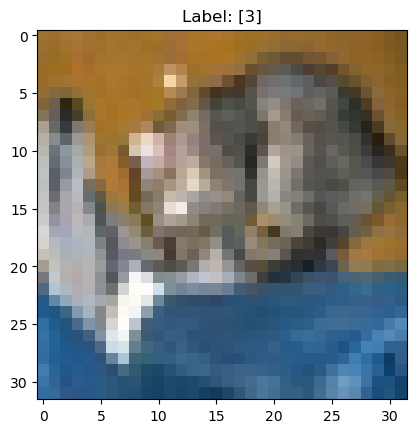

In [10]:
# Select the first image from the dataset to check the pixel size
image_index = 0
selected_image = test_images[image_index]

# Print the pixel values
print("Pixel values of the selected image:", selected_image)

# Display the selected image
plt.imshow(selected_image)
plt.title(f"Label: {test_labels[image_index]}")
plt.show()

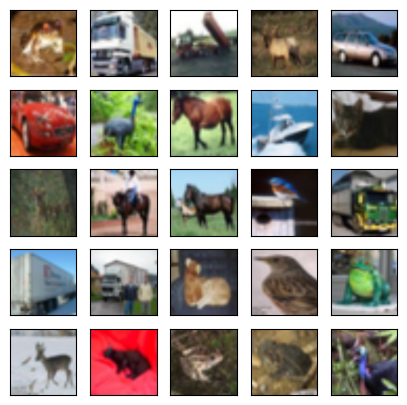

In [11]:
# Resize images to 100x100
resized_train_images = np.array([tf.image.resize(image, (100, 100)).numpy() for image in train_images[:25]])

# Plot 25 example images
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(resized_train_images[i])
plt.show()

## Neural network architecture
* CNN


In [12]:
# Define the fully connected model where the batch normalization replaces the 

def build_cnn_model(learning_rate=0.001):
    cnn_model = models.Sequential([

        # Define convolutional layer nbr.1
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),


        # Define convolutional layer nbr.2
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        # Define convolutional layer nbr.3
        layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        # Flatten and Dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')

    ])
    
    return cnn_model

cnn_model = build_cnn_model(learning_rate=0.001)

# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 15, 15, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      



### Compile the model


In [14]:
# Set the right optimizer and learning rate
# Optimizer = SGD, learning rate = 0.1, loss = cross entropy (categorical classification type) 

# Define the optimizer with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#add early stop

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


NameError: name 'EarlyStopping' is not defined

In [ ]:
cnn_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_37 (Bat  (None, 15, 15, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

### Train the model

We're now ready to train our model, which will involve feeding the training data (`train_images` and `train_labels`) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training.

In Lab 1, we saw how we can use `GradientTape` to optimize losses and train models with stochastic gradient descent. After defining the model settings in the `compile` step, we can also accomplish training by calling the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) method on an instance of the `Model` class. We will use this to train our fully connected model


In [ ]:


## BASE ATTEMPT
# Define the batch size and the number of epochs to use during training

# def build_cnn_model():
#     cnn_model = models.Sequential([

#         # Define convolutional layer nbr.1
#         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),


#         # Define convolutional layer nbr.2
#         layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),

#         # Flatten and Dense layers
#         layers.Flatten(),
#         layers.Dense(128, activation='relu'),
#         #layers.Dropout(0.5),
#         layers.Dense(10, activation='softmax')

#     ])
    
#     return cnn_model

# cnn_model = build_cnn_model()

# # Print the summary of the layers in the model.
# print(cnn_model.summary())

# epoch_size = 20

# history = cnn_model.fit(train_images, train_labels, epochs=epoch_size, 
#     validation_data=(test_images, test_labels))


# Epoch 1/20
# 1563/1563 [==============================] - 217s 99ms/step - loss: 1.2708 - accuracy: 0.5638 - val_loss: 1.3380 - val_accuracy: 0.5280
# Epoch 2/20
# 1563/1563 [==============================] - 193s 124ms/step - loss: 0.8506 - accuracy: 0.7042 - val_loss: 1.2175 - val_accuracy: 0.6096
# Epoch 3/20
# 1563/1563 [==============================] - 169s 108ms/step - loss: 0.6707 - accuracy: 0.7669 - val_loss: 1.0549 - val_accuracy: 0.6639
# Epoch 4/20
# 1563/1563 [==============================] - 167s 107ms/step - loss: 0.5288 - accuracy: 0.8153 - val_loss: 0.9343 - val_accuracy: 0.6983
# Epoch 5/20
# 1563/1563 [==============================] - 205s 131ms/step - loss: 0.4122 - accuracy: 0.8566 - val_loss: 1.0220 - val_accuracy: 0.6810
# Epoch 6/20
# 1563/1563 [==============================] - 170s 109ms/step - loss: 0.3155 - accuracy: 0.8888 - val_loss: 1.5419 - val_accuracy: 0.6674
# Epoch 7/20
# 1563/1563 [==============================] - 195s 125ms/step - loss: 0.2458 - accuracy: 0.9142 - val_loss: 1.5068 - val_accuracy: 0.6650
# Epoch 8/20
# 1563/1563 [==============================] - 168s 108ms/step - loss: 0.1951 - accuracy: 0.9314 - val_loss: 1.7338 - val_accuracy: 0.6481
# Epoch 9/20
# 1563/1563 [==============================] - 166s 106ms/step - loss: 0.1673 - accuracy: 0.9402 - val_loss: 1.5361 - val_accuracy: 0.6924
# Epoch 10/20
# 1563/1563 [==============================] - 193s 123ms/step - loss: 0.1436 - accuracy: 0.9492 - val_loss: 1.6000 - val_accuracy: 0.6923
# Epoch 11/20
# 1563/1563 [==============================] - 187s 120ms/step - loss: 0.1326 - accuracy: 0.9538 - val_loss: 1.5532 - val_accuracy: 0.6940
# Epoch 12/20
# 1563/1563 [==============================] - 176s 112ms/step - loss: 0.1179 - accuracy: 0.9590 - val_loss: 1.8806 - val_accuracy: 0.6875
# Epoch 13/20
# ...
# 1563/1563 [==============================] - 145s 93ms/step - loss: 0.0948 - accuracy: 0.9670 - val_loss: 1.7822 - val_accuracy: 0.6924
# Epoch 15/20
# 1563/1563 [==============================] - 152s 97ms/step - loss: 0.0931 - accuracy: 0.9669 - val_loss: 2.0105 - val_accuracy: 0.6862
# Epoch 16/20
#  203/1563 [==>...........................] - ETA: 2:14 - loss: 0.0627 - accuracy: 0.9777

In [ ]:
# Attempt 1: add drop-out and additional layer -> BEST RESULT (ALSO TESTED WITH LOWER LEARNING BUT THAT FORGOT TO LOG)

# def build_cnn_model(learning_rate=0.001):
#     cnn_model = models.Sequential([

#         # Define convolutional layer nbr.1
#         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),


#         # Define convolutional layer nbr.2
#         layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),

#         # Define convolutional layer nbr.3
#         layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),

#         # Flatten and Dense layers
#         layers.Flatten(),
#         layers.Dense(128, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(10, activation='softmax')

#     ])
    
#     return cnn_model

# cnn_model = build_cnn_model(learning_rate=0.001)

# # Print the summary of the layers in the model.
# print(cnn_model.summary())

# Epoch 1/20
# 1563/1563 [==============================] - 147s 92ms/step - loss: 1.5463 - accuracy: 0.4605 - val_loss: 1.1964 - val_accuracy: 0.5743
# Epoch 2/20
# 1563/1563 [==============================] - 142s 91ms/step - loss: 1.1450 - accuracy: 0.5964 - val_loss: 1.0278 - val_accuracy: 0.6349
# Epoch 3/20
# 1563/1563 [==============================] - 153s 98ms/step - loss: 0.9817 - accuracy: 0.6575 - val_loss: 0.9127 - val_accuracy: 0.6825
# Epoch 4/20
# 1563/1563 [==============================] - 138s 88ms/step - loss: 0.8843 - accuracy: 0.6922 - val_loss: 0.9263 - val_accuracy: 0.6822
# Epoch 5/20
# 1563/1563 [==============================] - 138s 88ms/step - loss: 0.7983 - accuracy: 0.7221 - val_loss: 0.8320 - val_accuracy: 0.7145
# Epoch 6/20
# 1563/1563 [==============================] - 143s 92ms/step - loss: 0.7356 - accuracy: 0.7423 - val_loss: 1.0150 - val_accuracy: 0.6640
# Epoch 7/20
# 1563/1563 [==============================] - 148s 94ms/step - loss: 0.6883 - accuracy: 0.7614 - val_loss: 0.8087 - val_accuracy: 0.7263
# Epoch 8/20
# 1563/1563 [==============================] - 141s 90ms/step - loss: 0.6357 - accuracy: 0.7776 - val_loss: 0.9706 - val_accuracy: 0.6894
# Epoch 9/20
# 1563/1563 [==============================] - 140s 89ms/step - loss: 0.5927 - accuracy: 0.7927 - val_loss: 0.8185 - val_accuracy: 0.7320
# Epoch 10/20
# 1563/1563 [==============================] - 143s 92ms/step - loss: 0.5629 - accuracy: 0.8034 - val_loss: 0.7976 - val_accuracy: 0.7338
# Epoch 11/20
# 1563/1563 [==============================] - 146s 94ms/step - loss: 0.5308 - accuracy: 0.8140 - val_loss: 0.8068 - val_accuracy: 0.7404
# Epoch 12/20
# 1563/1563 [==============================] - 144s 92ms/step - loss: 0.5010 - accuracy: 0.8228 - val_loss: 0.8088 - val_accuracy: 0.7441
# Epoch 13/20
# ...
# Epoch 19/20
# 1563/1563 [==============================] - 150s 96ms/step - loss: 0.3593 - accuracy: 0.8726 - val_loss: 1.0348 - val_accuracy: 0.7259
# Epoch 20/20
# 1563/1563 [==============================] - 214s 137ms/step - loss: 0.3505 - accuracy: 0.8765 - val_loss: 0.9595 - val_accuracy: 0.7309

In [ ]:
#Attempt3 add additional dropout layer -> NOT IMPROVED

# def build_cnn_model():
#     cnn_model = models.Sequential([

#         # Define convolutional layer nbr.1
#         layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),


#         # Define convolutional layer nbr.2
#         layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),

#         # Define convolutional layer nbr.3
#         layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#         layers.MaxPool2D(pool_size=(2, 2)),
#         layers.BatchNormalization(),
#         layers.Dropout(0.1),

#         # Flatten and Dense layers
#         layers.Flatten(),
#         layers.Dense(128, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(10, activation='softmax')

#     ])
    
#     return cnn_model

# cnn_model = build_cnn_model()

# cnn_model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# #add early stop

# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Epoch 1/20
# 1563/1563 [==============================] - 141s 88ms/step - loss: 1.5599 - accuracy: 0.4568 - val_loss: 2.2192 - val_accuracy: 0.3369
# Epoch 2/20
# 1563/1563 [==============================] - 119s 76ms/step - loss: 1.1494 - accuracy: 0.5952 - val_loss: 0.9715 - val_accuracy: 0.6517
# Epoch 3/20
# 1563/1563 [==============================] - 113s 72ms/step - loss: 1.0008 - accuracy: 0.6506 - val_loss: 1.0976 - val_accuracy: 0.6090
# Epoch 4/20
# 1563/1563 [==============================] - 116s 75ms/step - loss: 0.9051 - accuracy: 0.6868 - val_loss: 1.2729 - val_accuracy: 0.5814
# Epoch 5/20
# 1563/1563 [==============================] - 126s 80ms/step - loss: 0.8338 - accuracy: 0.7130 - val_loss: 1.0592 - val_accuracy: 0.6339
# Epoch 6/20
# 1563/1563 [==============================] - 130s 83ms/step - loss: 0.7739 - accuracy: 0.7325 - val_loss: 0.7915 - val_accuracy: 0.7239
# Epoch 7/20
# 1563/1563 [==============================] - 124s 79ms/step - loss: 0.7269 - accuracy: 0.7495 - val_loss: 0.9516 - val_accuracy: 0.6901
# Epoch 8/20
# 1563/1563 [==============================] - 120s 77ms/step - loss: 0.6907 - accuracy: 0.7604 - val_loss: 0.7843 - val_accuracy: 0.7327
# Epoch 9/20
# 1563/1563 [==============================] - 137s 88ms/step - loss: 0.6520 - accuracy: 0.7719 - val_loss: 0.8360 - val_accuracy: 0.7238
# Epoch 10/20
# 1563/1563 [==============================] - 121s 77ms/step - loss: 0.6204 - accuracy: 0.7834 - val_loss: 0.7708 - val_accuracy: 0.7431
# Epoch 11/20
# 1563/1563 [==============================] - 142s 91ms/step - loss: 0.5892 - accuracy: 0.7934 - val_loss: 0.9478 - val_accuracy: 0.7014
# Epoch 12/20
# 1563/1563 [==============================] - 126s 81ms/step - loss: 0.5672 - accuracy: 0.8013 - val_loss: 0.8912 - val_accuracy: 0.7003
# Epoch 13/20
# ...
# Epoch 14/20
# 1563/1563 [==============================] - 127s 81ms/step - loss: 0.5194 - accuracy: 0.8187 - val_loss: 0.8635 - val_accuracy: 0.7217
# Epoch 15/20
# 1563/1563 [==============================] - 131s 84ms/step - loss: 0.5085 - accuracy: 0.8248 - val_loss: 1.0678 - val_accuracy: 0.6763



In [ ]:
## ATTEMPT 4: reduce epoch -> NOT IMPROVED


# Define convolutional layer nbr.1
        # layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        # layers.MaxPool2D(pool_size=(2, 2)),
        # layers.BatchNormalization(),


        # # Define convolutional layer nbr.2
        # layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        # layers.MaxPool2D(pool_size=(2, 2)),
        # layers.BatchNormalization(),

        # # Define convolutional layer nbr.3
        # layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        # layers.MaxPool2D(pool_size=(2, 2)),
        # layers.BatchNormalization(),

        # # Flatten and Dense layers
        # layers.Flatten(),
        # layers.Dense(64, activation='relu'),
        # layers.Dense(10, activation='softmax')


# Define the batch size and the number of epochs to use during training
# batch_size = 64
# epoch_size = 5

# history = cnn_model.fit(train_images, train_labels, epochs=epoch_size, 
#     validation_data=(test_images, test_labels))

# Epoch 1/5
# 1563/1563 [==============================] - 113s 71ms/step - loss: 1.5413 - accuracy: 0.4328 - val_loss: 1.2765 - val_accuracy: 0.5361
# Epoch 2/5
# 1563/1563 [==============================] - 95s 61ms/step - loss: 1.1868 - accuracy: 0.5751 - val_loss: 1.1181 - val_accuracy: 0.6043
# Epoch 3/5
# 1563/1563 [==============================] - 86s 55ms/step - loss: 1.0377 - accuracy: 0.6344 - val_loss: 1.0441 - val_accuracy: 0.6298
# Epoch 4/5
# 1563/1563 [==============================] - 80s 51ms/step - loss: 0.9427 - accuracy: 0.6696 - val_loss: 1.0175 - val_accuracy: 0.6467
# Epoch 5/5
# 1563/1563 [==============================] - 93s 59ms/step - loss: 0.8729 - accuracy: 0.6932 - val_loss: 0.9356 - val_accuracy: 0.6734

In [ ]:
## ATTEMPT 2 extra dropout layer and early stop

# Define the batch size and the number of epochs to use during training
epoch_size = 20

history = cnn_model.fit(train_images, train_labels, epochs=epoch_size, 
    validation_data=(test_images, test_labels), callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 133s 83ms/step - loss: 1.6822 - accuracy: 0.4105 - val_loss: 1.4551 - val_accuracy: 0.5025
Epoch 2/20
1563/1563 [==============================] - 120s 77ms/step - loss: 1.3347 - accuracy: 0.5322 - val_loss: 1.2500 - val_accuracy: 0.5506
Epoch 3/20
1563/1563 [==============================] - 107s 68ms/step - loss: 1.2468 - accuracy: 0.5685 - val_loss: 1.2497 - val_accuracy: 0.5626
Epoch 4/20
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1875 - accuracy: 0.5919 - val_loss: 1.0740 - val_accuracy: 0.6196
Epoch 5/20
1563/1563 [==============================] - 107s 68ms/step - loss: 1.1376 - accuracy: 0.6116 - val_loss: 1.0425 - val_accuracy: 0.6361
Epoch 6/20
1563/1563 [==============================] - 107s 69ms/step - loss: 1.0944 - accuracy: 0.6293 - val_loss: 1.3654 - val_accuracy: 0.5406
Epoch 7/20
1563/1563 [==============================] - 108s 69ms/step - loss: 1.0644 - accuracy: 0.6388 - val_loss: 1

### Evaluate accuracy

In [ ]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.1002 - accuracy: 0.9707 - 645ms/epoch - 2ms/step
Test accuracy: 0.9707000255584717
